### Knn

https://joserzapata.github.io/courses/python-ciencia-datos/ml/

<img src="https://miro.medium.com/max/2805/0*IT9aLhgbOVDkMNKM" width=400  />


https://www.kaggle.com/code/jchen2186/machine-learning-with-iris-dataset/notebook

https://scikit-learn.org/stable/auto_examples/datasets/plot_iris_dataset.html

In [41]:
## Importar Librerias
from sklearn import neighbors, datasets, preprocessing
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.preprocessing import label_binarize
import matplotlib.pyplot as plt

from sklearn.metrics import roc_curve, auc

In [2]:
##  Cargar Dataset
iris = datasets.load_iris()
type(iris)

sklearn.utils.Bunch

In [24]:
## Definir cual es la columna de salida
## este dataset ya esta representado como numpy.array
X, y = iris.data[:, :2], iris.target

In [4]:
## Division del dataset en datos de entrenamiento y de prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [5]:
## Standarizacion de los valores
scaler = preprocessing.StandardScaler().fit(X_train)

X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [25]:
## Selección del algoritmo de machine learning.classifier = clf
clf = RandomForestClassifier(max_depth=2,random_state=0)

RandomForestClassifier(max_depth=2, random_state=0)

In [28]:
## Entrenamiento del Modelo
clf = clf.fit(X_train, y_train)

In [11]:
## Prediccion
y_pred = clf.predict(X_test)

In [12]:
## Evaluacion
accuracy_score(y_test, y_pred)

0.8666666666666667

In [23]:
## Matriz de confusión 
print(confusion_matrix(y_test, y_pred))

[[10  0  0]
 [ 0  7  2]
 [ 0  2  9]]


In [22]:
## Reporte de clasificación
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       0.78      0.78      0.78         9
           2       0.82      0.82      0.82        11

    accuracy                           0.87        30
   macro avg       0.87      0.87      0.87        30
weighted avg       0.87      0.87      0.87        30



### Roc????

Area under the ROC curve : 0.795491


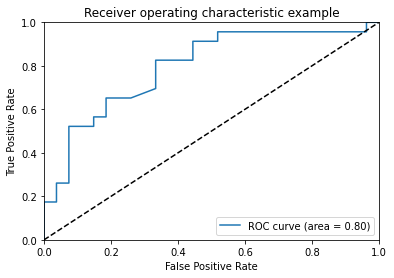

In [72]:
%matplotlib inline

import numpy as np
import pylab as pl
from sklearn import svm, datasets
from sklearn.utils import shuffle
from sklearn.metrics import roc_curve, auc

random_state = np.random.RandomState(0)

# Import some data to play with
iris = datasets.load_iris()
X = iris.data
y = iris.target

# Make it a binary classification problem by removing the third class
X, y = X[y != 2], y[y != 2]
n_samples, n_features = X.shape

# Add noisy features to make the problem harder
X = np.c_[X, random_state.randn(n_samples, 200 * n_features)]

# shuffle and split training and test sets
X, y = shuffle(X, y, random_state=random_state)
half = int(n_samples / 2)
X_train, X_test = X[:half], X[half:]
y_train, y_test = y[:half], y[half:]

# Run classifier
classifier = svm.SVC(kernel='linear', probability=True)
probas_ = classifier.fit(X_train, y_train).predict_proba(X_test)

# Compute ROC curve and area the curve
fpr, tpr, thresholds = roc_curve(y_test, probas_[:, 1])
roc_auc = auc(fpr, tpr)
print ("Area under the ROC curve : %f" % roc_auc)

# Plot ROC curve
pl.clf()
pl.plot(fpr, tpr, label='ROC curve (area = %0.2f)' % roc_auc)
pl.plot([0, 1], [0, 1], 'k--')
pl.xlim([0.0, 1.0])
pl.ylim([0.0, 1.0])
pl.xlabel('False Positive Rate')
pl.ylabel('True Positive Rate')
pl.title('Receiver operating characteristic example')
pl.legend(loc="lower right")
pl.show()

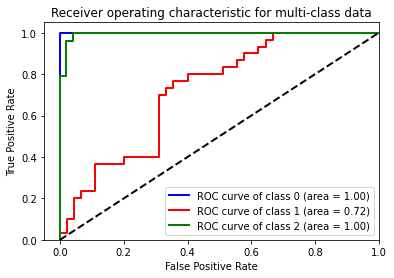

In [45]:
import matplotlib.pyplot as plt
from sklearn import svm, datasets
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import label_binarize
from sklearn.metrics import roc_curve, auc
from sklearn.multiclass import OneVsRestClassifier
from itertools import cycle

iris = datasets.load_iris()
X = iris.data
y = iris.target

# Binarize the output
y = label_binarize(y, classes=[0, 1, 2])
n_classes = y.shape[1]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.5, random_state=0)

classifier = OneVsRestClassifier(svm.SVC(kernel='linear', probability=True,
                                 random_state=0))
y_score = classifier.fit(X_train, y_train).decision_function(X_test)

fpr = dict()
tpr = dict()
roc_auc = dict()
lw=2
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test[:, i], y_score[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])
colors = cycle(['blue', 'red', 'green'])
for i, color in zip(range(n_classes), colors):
    plt.plot(fpr[i], tpr[i], color=color, lw=2,
             label='ROC curve of class {0} (area = {1:0.2f})'
             ''.format(i, roc_auc[i]))
plt.plot([0, 1], [0, 1], 'k--', lw=lw)
plt.xlim([-0.05, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic for multi-class data')
plt.legend(loc="lower right")
plt.show()